# Train a score-based diffusion model to generate a 1d distribution.

We use **seaborn** to plot probability density function. 

For installation and introduction, see:

https://seaborn.pydata.org/

https://seaborn.pydata.org/installing.html




In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import torch
import torch.nn as nn
import math

from torch.utils.data import DataLoader

import seaborn as sns

from sklearn.datasets import make_moons, make_circles

## Step 1, generate data.

We generate data by sampling a Brownian dynamics. 

We simply reuse the potential $V$ we studied before for Markov state models and learning eigenfunctions.

### 1.1. functions that define potential and sampling, and also set parameters

In [64]:
a = [-1, -1, -6.5, 0.7]
b = [0, 0, 11, 0.6]
c = [-10, -10, -6.5, 0.7]
A = [-20, -10, -17, 1.5] 
xc = [1, 0, -0.5, -1]
yc = [0, 0.5, 1.5, 1]

def V(x):
    s = 0
    for i in range(4):
        dx = x[0] - xc[i]
        dy = x[1] - yc[i]
        s += self.A[i] * np.exp(self.a[i] * dx**2 + self.b[i] * dx * dy + self.c[i] * dy**2)
    return s

def gradV(x):

    dVx = 4 * x[0] * (x[0]**2 - 1.0)
    dVy = 8 * x[1] * (x[1]**2 - 1.0)

def gradV1(x):
    s = 0
    dVx = 0
    dVy = 0
    for i in range(4):
        dx = x[0] - xc[i]
        dy = x[1] - yc[i]            
        dVx += A[i] * (2 * a[i] * dx + b[i] * dy) * np.exp(a[i] * dx**2 + b[i] * dx * dy + c[i] * dy**2)
        dVy += A[i] * (b[i] * dx + 2 * c[i] * dy) * np.exp(a[i] * dx**2 + b[i] * dx * dy + c[i] * dy**2)
    return np.array((dVx, dVy))
    
def gradV(x):

    dVx = 4 * x[0] * (x[0]**2 - 1.0)
    dVy = 4 * x[1]

    return np.array((dVx, dVy))


# sample the SDE using Euler-Maruyama scheme
def sample(beta=1.0, dt=0.001, N=10000, seed=42):
    rng = np.random.default_rng(seed=seed)
    X = np.array([-0.6, 1.2])
    traj = []
    tlist = []
    for i in range(N):
        traj.append(X)
        tlist.append(dt*i)        
        b = rng.normal(size=2)
        X = X - gradV(X) * dt + np.sqrt(2 * dt/beta) * b

    return np.array(tlist), np.array(traj)  


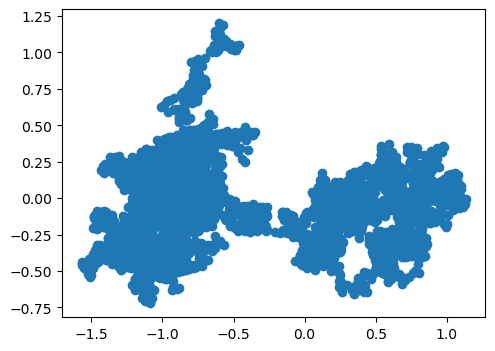

In [68]:
# coefficient in SDE
beta = 3.0
# step-size 
dt = 0.001
# number of sampling steps 
N = 5000

# sampling SDE
tvec, X = sample(beta, dt=dt, N=N)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(X[:, 0], X[:, 1])



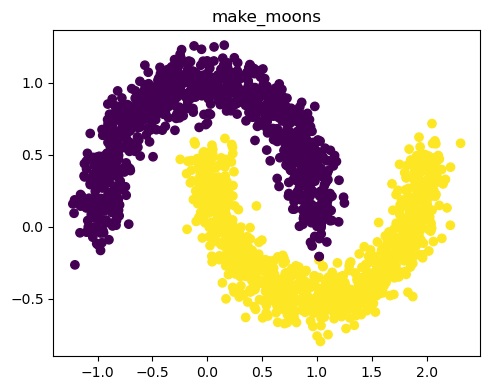

(2000, 2)


In [14]:
n_samples = 2000

X, Y = make_moons(n_samples, noise=0.1, random_state=10)

fig, ax = plt.subplots(1,1, figsize=(5, 4))

ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set_title("make_moons")

plt.tight_layout()
plt.show()

print (X.shape)

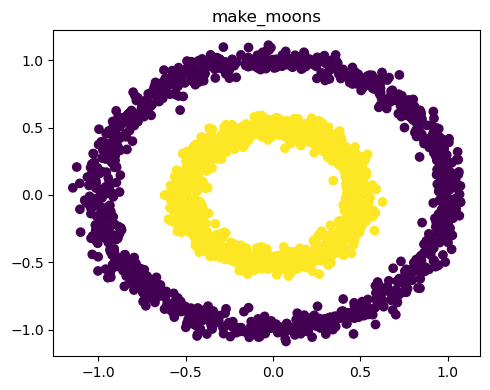

(2000, 2)


In [20]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))

n_samples = 2000

X, Y = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)

ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set_title("make_moons")

plt.tight_layout()
plt.show()

print (X.shape)